In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df_train=pd.read_csv("blackFriday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
df_test=pd.read_csv("blackFriday_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

In [6]:
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.shape

(783667, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


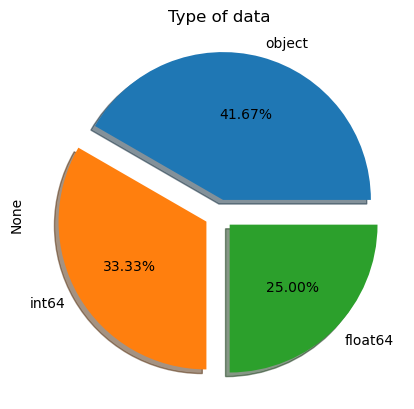

In [10]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title("Type of data");

In [11]:
df.drop(['User_ID'],axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df['Gender']=df['Gender'].map({'F': 0, 'M': 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Age']=df['Age'].map({'0-17': 0, '18-25': 1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df_city=pd.get_dummies(df.City_Category, drop_first=True)
df=pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
df.drop(["City_Category"],axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [22]:
df['Product_Category_2'].isnull().sum()

0

In [23]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [24]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [25]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [26]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [27]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].median())
df['Purchase'].isnull().sum()

0

In [28]:
df.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [29]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace ('+', '')

In [32]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [33]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [34]:
df.drop('Product_ID', axis=1, inplace=True)

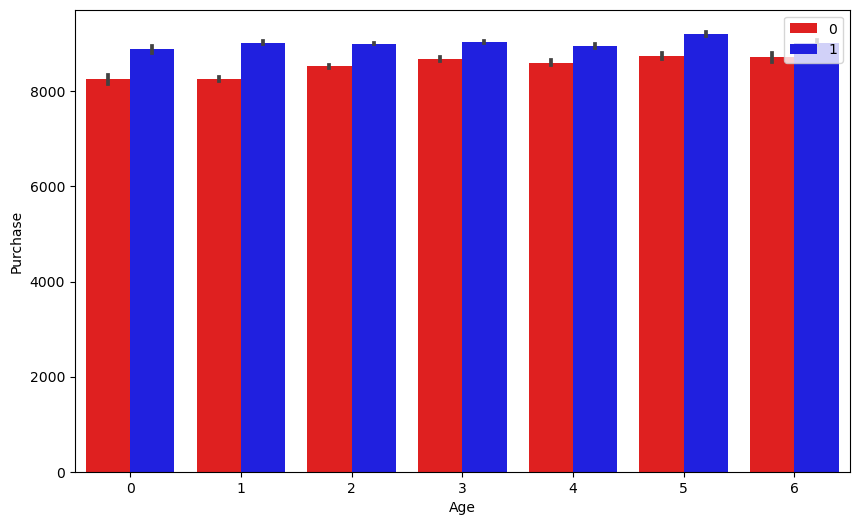

In [35]:
plt.figure(figsize=(10,6))
sns.barplot('Age', 'Purchase', hue='Gender', data=df, palette=('red', 'blue'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)

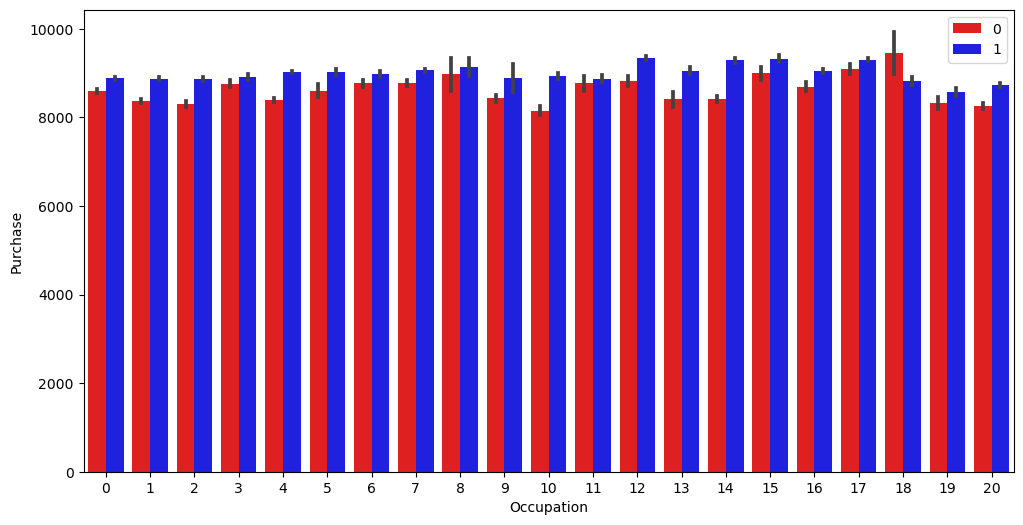

In [84]:
plt.figure (figsize=(12,6))
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df, palette=('red', 'blue'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

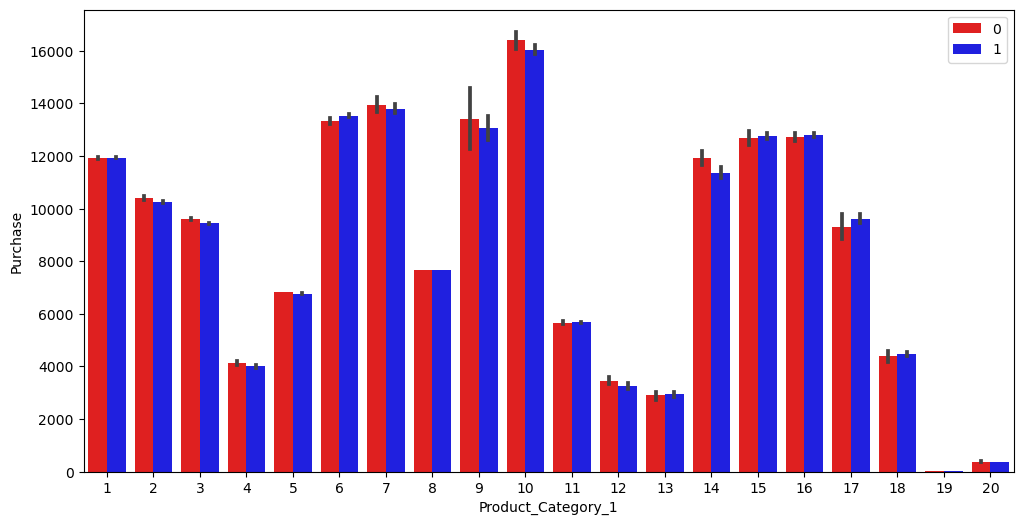

In [36]:
plt.figure (figsize=(12,6))
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df, palette=('red', 'blue'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

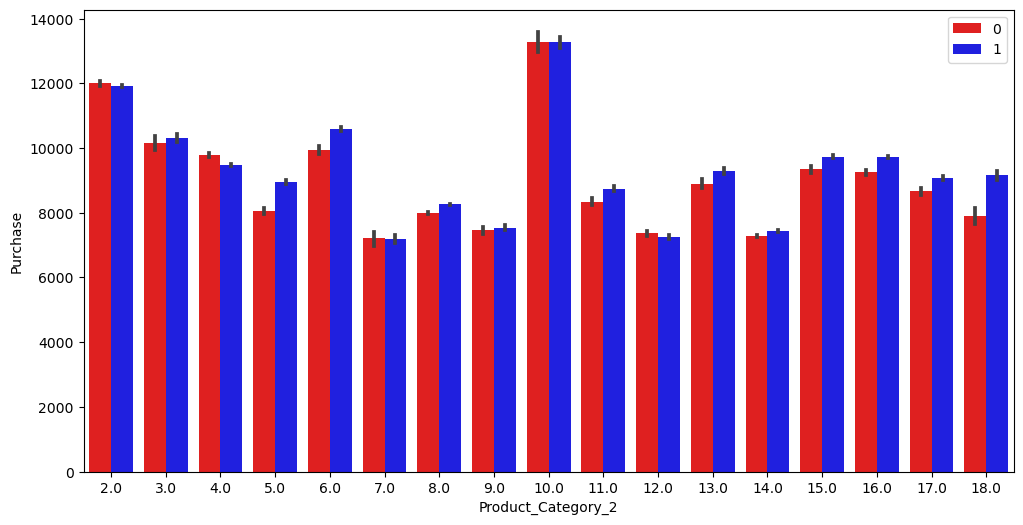

In [37]:
plt.figure(figsize=(12,6))
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df, palette=('red', 'blue'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

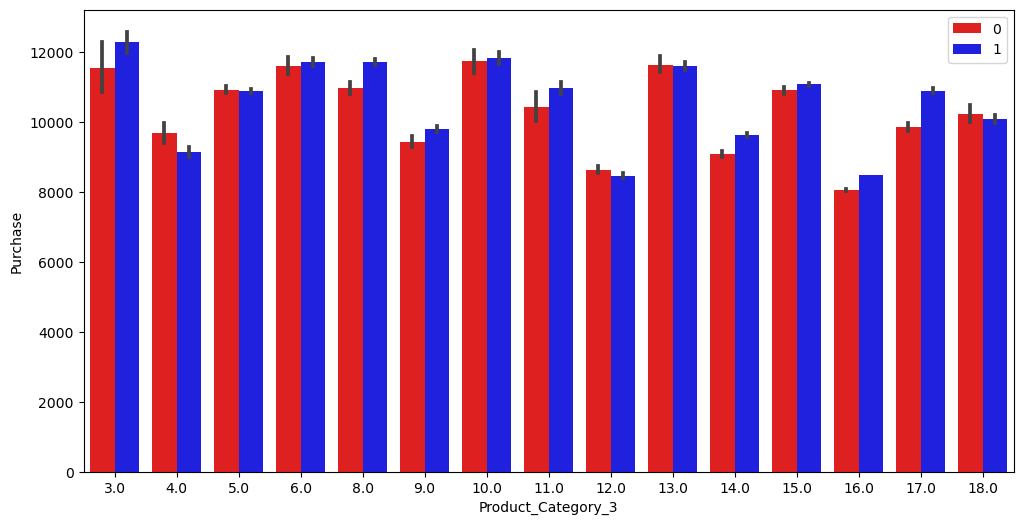

In [38]:
plt.figure(figsize=(12,6))
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df, palette=('red', 'blue'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

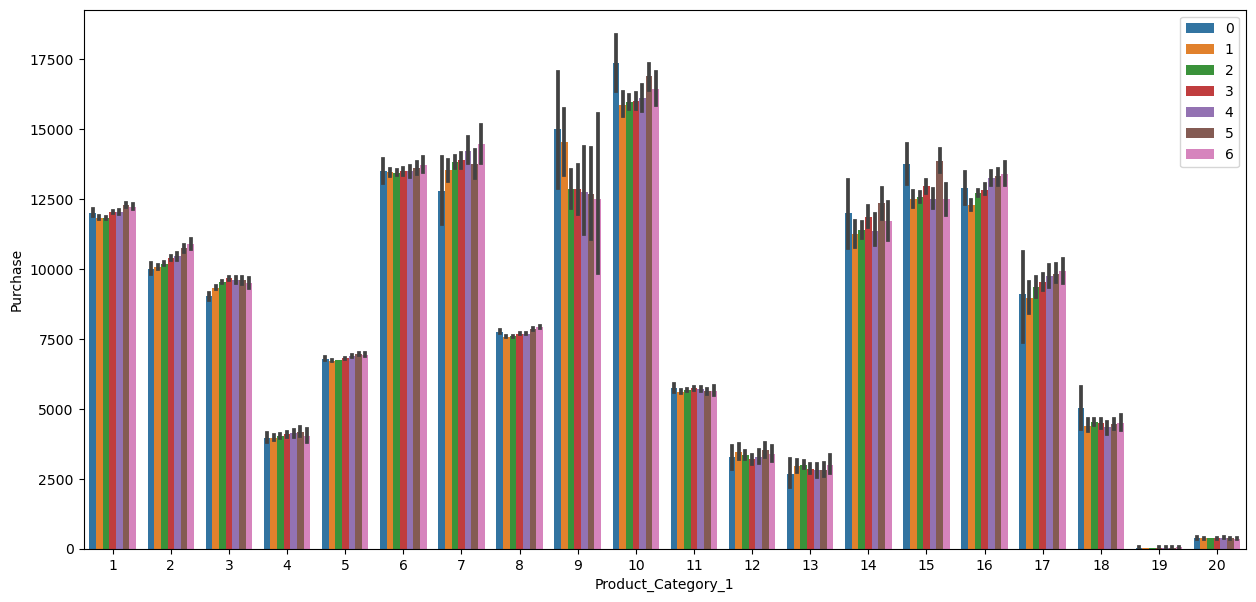

In [39]:
plt.figure(figsize=(15,7))
sns.barplot('Product_Category_1', 'Purchase', hue='Age', data=df)
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

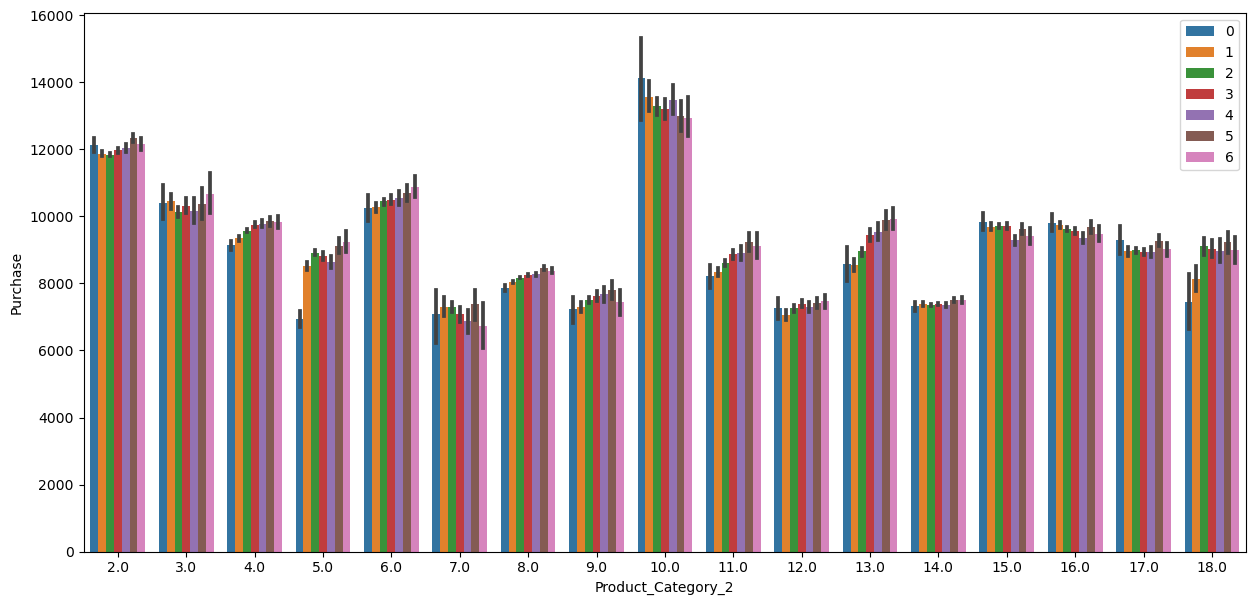

In [40]:
plt.figure(figsize=(15,7))
sns.barplot('Product_Category_2', 'Purchase', hue='Age', data=df)
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

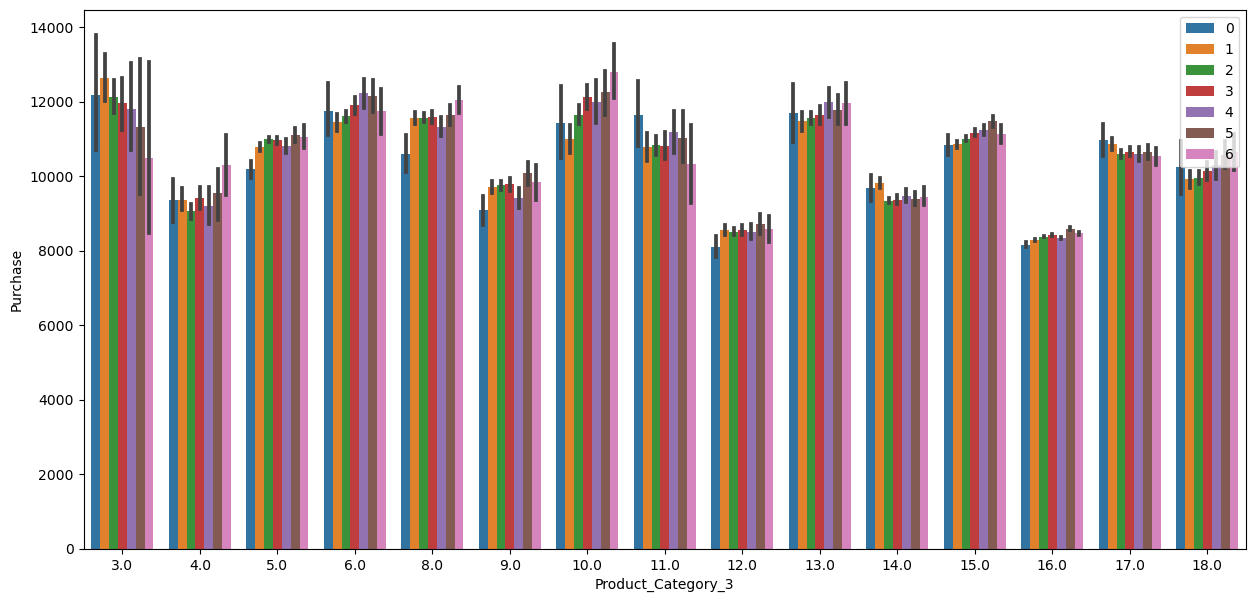

In [41]:
plt.figure(figsize=(15,7))
sns.barplot('Product_Category_3', 'Purchase', hue='Age', data=df)
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

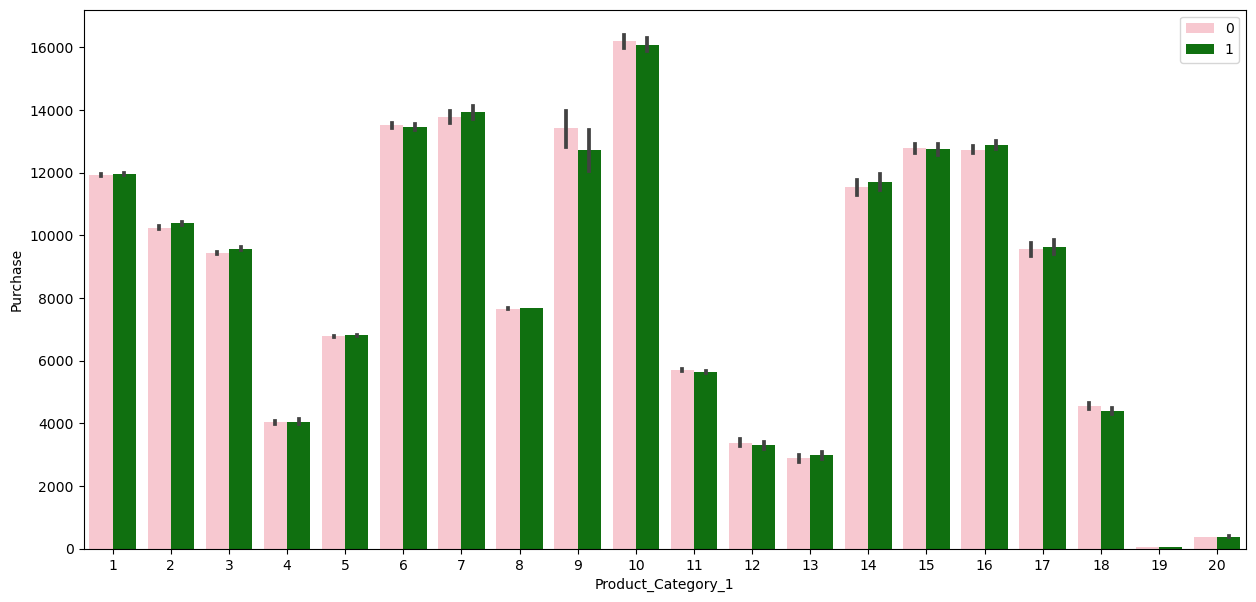

In [42]:
plt.figure(figsize=(15,7))
sns.barplot('Product_Category_1', 'Purchase', hue='Marital_Status', data=df, palette=('pink', 'green'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

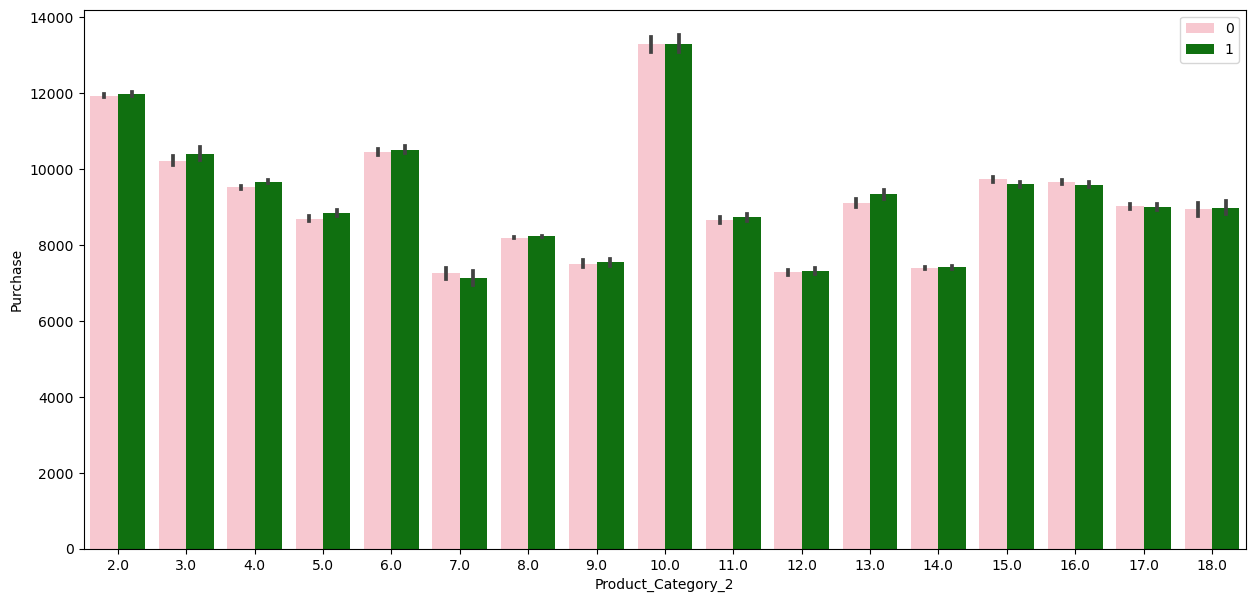

In [43]:
plt.figure(figsize=(15,7))
sns.barplot('Product_Category_2', 'Purchase', hue='Marital_Status', data=df, palette=('pink', 'green'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

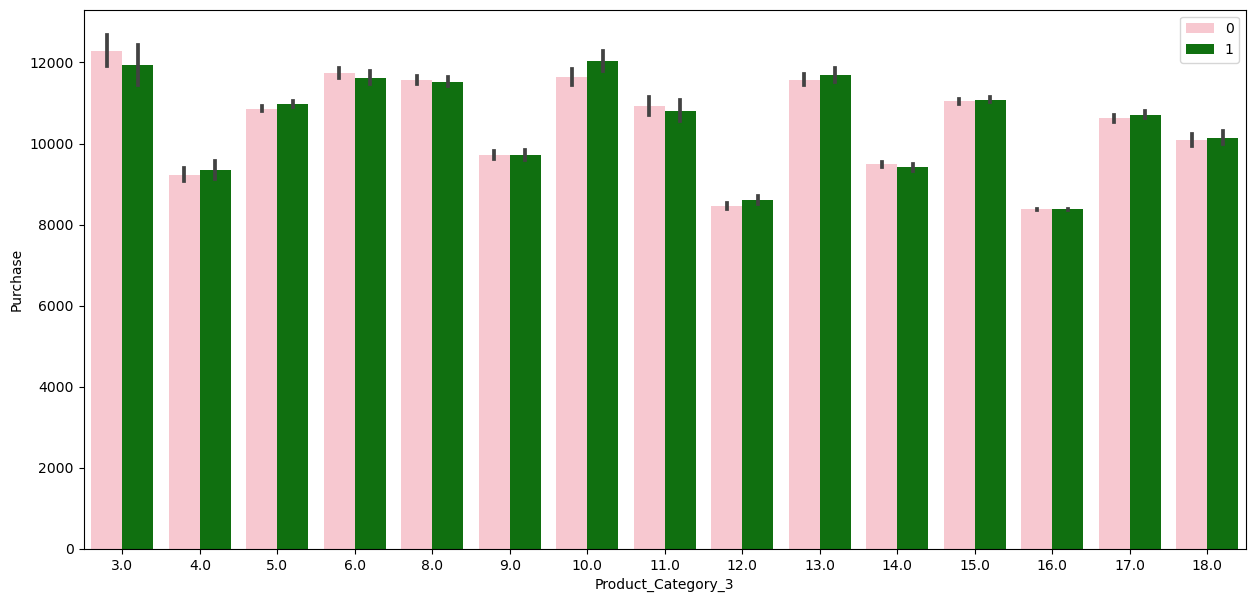

In [44]:
plt.figure(figsize=(15,7))
sns.barplot('Product_Category_3', 'Purchase', hue='Marital_Status', data=df, palette=('pink', 'green'))
plt.legend(bbox_to_anchor=(1,1), loc='upper right', ncol=1)

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

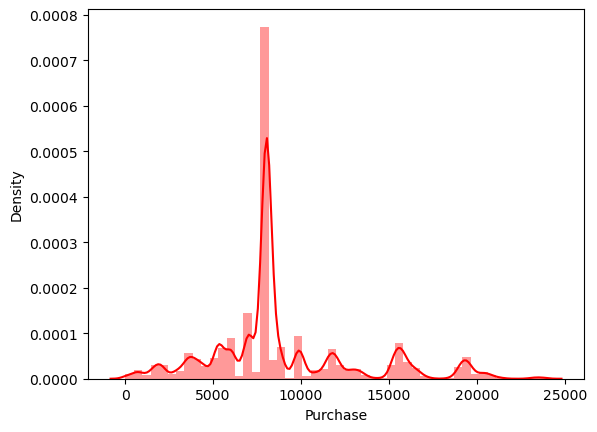

In [45]:
sns.distplot(df['Purchase'], kde='True', color='r')

In [46]:
df['Purchase']=np.log(df['Purchase'])

In [47]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,9.032409,0,0
1,0,0,10,2,0,1,6.0,14.0,9.629051,0,0
2,0,0,10,2,0,12,8.0,16.0,7.259820,0,0
3,0,0,10,2,0,12,14.0,16.0,6.963190,0,0
4,1,6,16,4,0,8,8.0,16.0,8.983314,0,1


<AxesSubplot:>

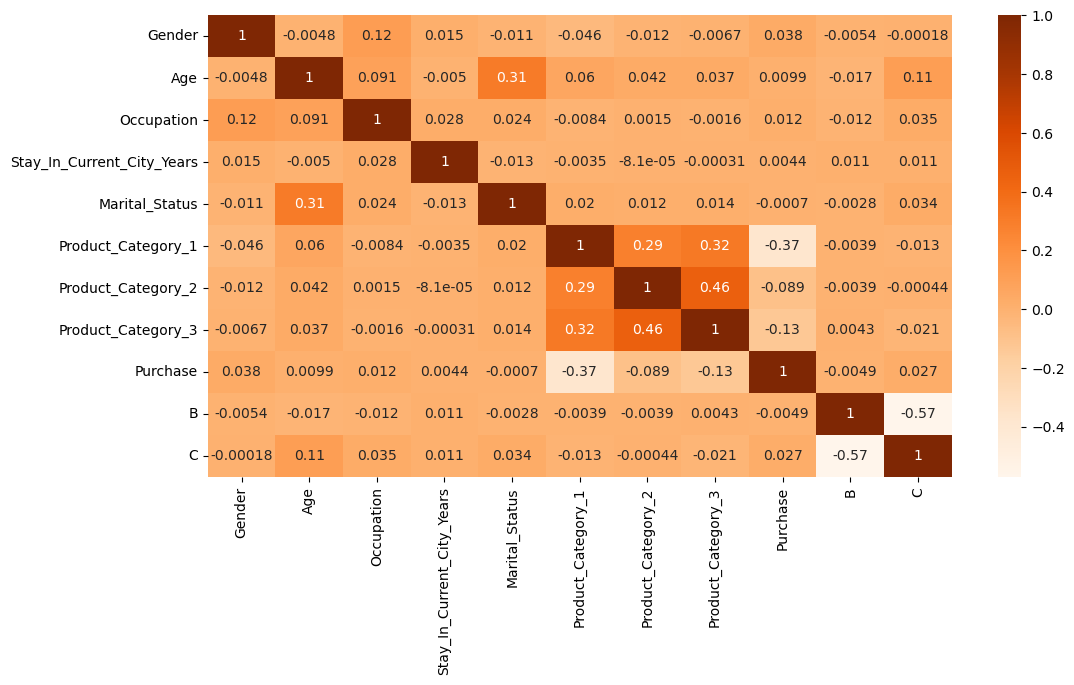

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='Oranges', annot=True)

In [49]:
#train and test the data
y=df['Purchase']

In [50]:
x=df[['Gender', 'Occupation', 'Stay_In_Current_City_Years', 
      'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3', 'B', 'C' ]]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import make_classification

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [53]:
lm=LinearRegression()

In [54]:
lm.fit(x_train, y_train)

LinearRegression()

In [55]:
print('Coefficients:\n', lm.coef_)

Coefficients:
 [ 0.03091773  0.00051559  0.00148474  0.00666639 -0.05929062  0.00464342
 -0.0064951   0.01274316  0.03523227]


In [56]:
predications=lm.predict(x_test)

Text(0, 0.5, 'predicated Y')

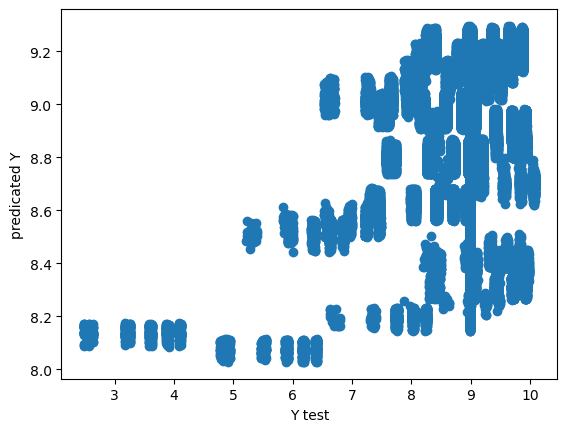

In [57]:
plt.scatter(y_test,predications)
plt.xlabel('Y test')
plt.ylabel ('predicated Y')

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predications))
print('MSE:', metrics.mean_squared_error(y_test, predications))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predications)))

MAE: 0.3763057332650673
MSE: 0.33012043418556003
RMSE: 0.5745610795951637


In [59]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, predications)
print("r2 score for the perfect model is:", r2)

r2 score for the perfect model is: 0.13736685835783402


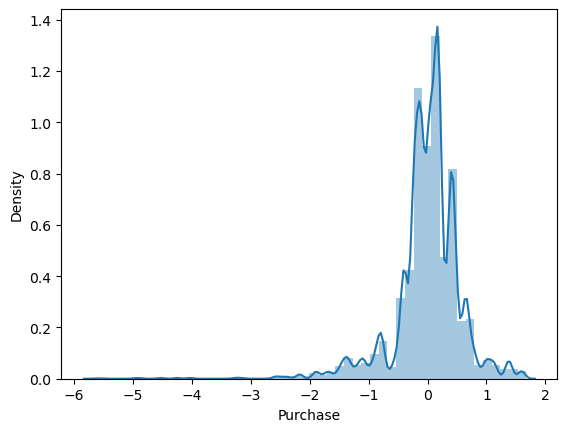

In [60]:
sns.distplot((y_test-predications),bins=50);

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [71]:
dt = DecisionTreeRegressor()

In [72]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [73]:
preddt=dt.predict(x_test)

Text(0, 0.5, 'predicated Y')

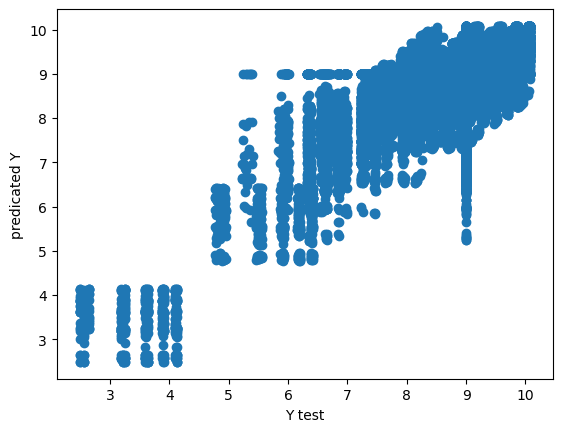

In [74]:
plt.scatter(y_test,preddt)
plt.xlabel('Y test')
plt.ylabel ('predicated Y')

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))

MAE: 0.31929971250183614
MSE: 0.20114241243829473
RMSE: 0.44848903268451806


In [76]:
r2=r2_score(y_test, preddt)
print("r2 score for the perfect model is:", r2)

r2 score for the perfect model is: 0.47439754346863705


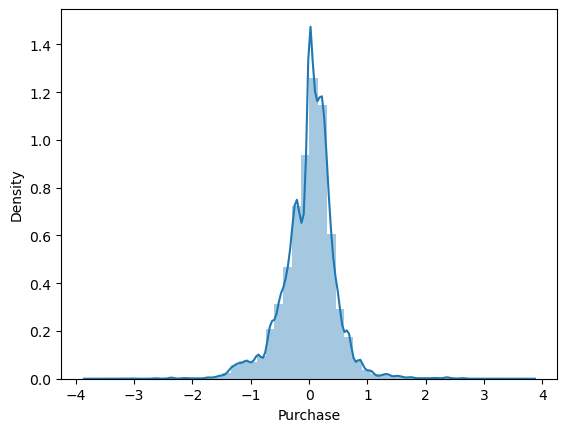

In [77]:
sns.distplot((y_test-preddt),bins=50);